In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/adib-/Downloads/RA_21_22.csv')
df

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60
2,4193.294199,1989,40,male,no college,other,216439.77,139939.51,26681.80,18658.60,83739.63
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80
...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64


In [3]:
df['wealth']=df['asset_total']-df['debt_total']
df['wealth']

0          2201.71
1             0.00
2        189757.97
3         13676.76
4          7687.34
           ...    
47771    156800.00
47772    264400.00
47773    -33500.00
47774      4330.00
47775     76700.00
Name: wealth, Length: 47776, dtype: float64

In [4]:
df

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income,wealth
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17,2201.71
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60,0.00
2,4193.294199,1989,40,male,no college,other,216439.77,139939.51,26681.80,18658.60,83739.63,189757.97
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33,13676.76
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80,7687.34
...,...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28,156800.00
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73,264400.00
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46,-33500.00
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64,4330.00


In [5]:
def weighted_median(sub_df):
    sub_df = sub_df.sort_values(by='wealth')
    
    sub_df['cum_weights'] = sub_df['weight'].cumsum()
    
    half_weight = sub_df['weight'].sum() / 2
    median_wealth = sub_df[sub_df['cum_weights'] >= half_weight]['wealth'].iloc[0]
    
    return median_wealth

In [6]:
medians = df.groupby(['race', 'education']).apply(weighted_median).reset_index()

In [7]:
medians.columns=['Race','Education','weighted_median']

In [8]:
medians

,Race,Education,weighted_median
0,Hispanic,college degree,88166.05
1,Hispanic,no college,12641.51
2,Hispanic,some college,23096.74
3,black,college degree,78150.00
4,black,no college,9616.36
5,black,some college,19590.99
6,other,college degree,232354.57
7,other,no college,34335.78
8,other,some college,54724.78
9,white,college degree,322970.39


In [9]:
## OR with year for plotting
medians1=df.groupby(['race', 'education','year']).apply(weighted_median).reset_index()
medians1.columns=['Race','Education','Year','weighted_median']
medians1

,Race,Education,Year,weighted_median
0,Hispanic,college degree,1989,3358.55
1,Hispanic,college degree,1992,57523.46
2,Hispanic,college degree,1995,94148.19
3,Hispanic,college degree,1998,194332.52
4,Hispanic,college degree,2001,158924.03
...,...,...,...,...
115,white,some college,2004,125677.49
116,white,some college,2007,149615.54
117,white,some college,2010,96605.73
118,white,some college,2013,89613.30


In [10]:
palette_colors = {
    'Hispanic': '#d62728',  # Red
    'black': '#1f77b4',    # Navy Blue
    'other': '#2ca02c',    # Green
    'white': '#ff7f0e'     # Orange
}

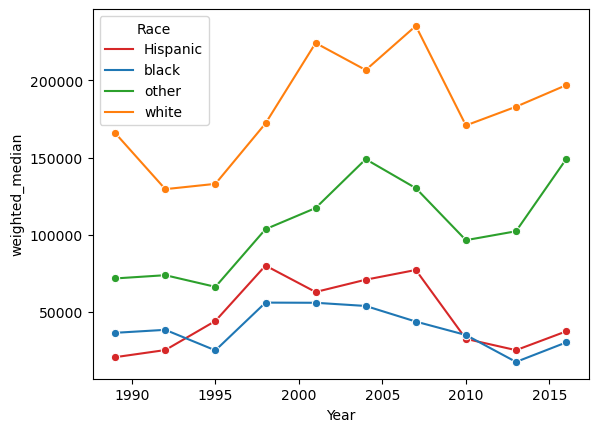

In [11]:

sns.lineplot(data=medians1, x='Year', y='weighted_median', hue='Race', marker='o',errorbar=None,palette=palette_colors)

plt.show()

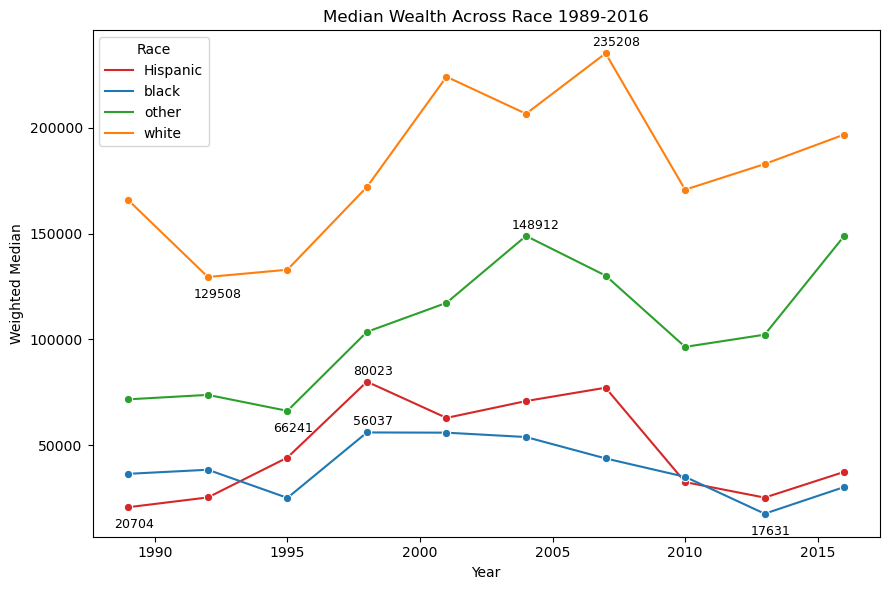

In [12]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(data=medians1, x='Year', y='weighted_median', hue='Race',errorbar=None,marker='o',palette=palette_colors)

for line, name in zip(ax.lines, medians1['Race'].unique()):
    y = line.get_ydata()
    x = line.get_xdata()
    
    # annotate the highest point
    ymax = max(y)
    xpos_ymax = y.argmax()
    x_ymax = x[xpos_ymax]
    ax.annotate(f'{int(ymax)}', xy=(x_ymax, ymax), xytext=(-10,5), textcoords='offset points', fontsize=9)
    
    # annotate the lowest point
    ymin = min(y)
    xpos_ymin = y.argmin()
    x_ymin = x[xpos_ymin]
    ax.annotate(f'{int(ymin)}', xy=(x_ymin, ymin), xytext=(-10,-15), textcoords='offset points', fontsize=9)

        
plt.title('Median Wealth Across Race 1989-2016')
plt.ylabel('Weighted Median')
plt.tight_layout()
plt.show()


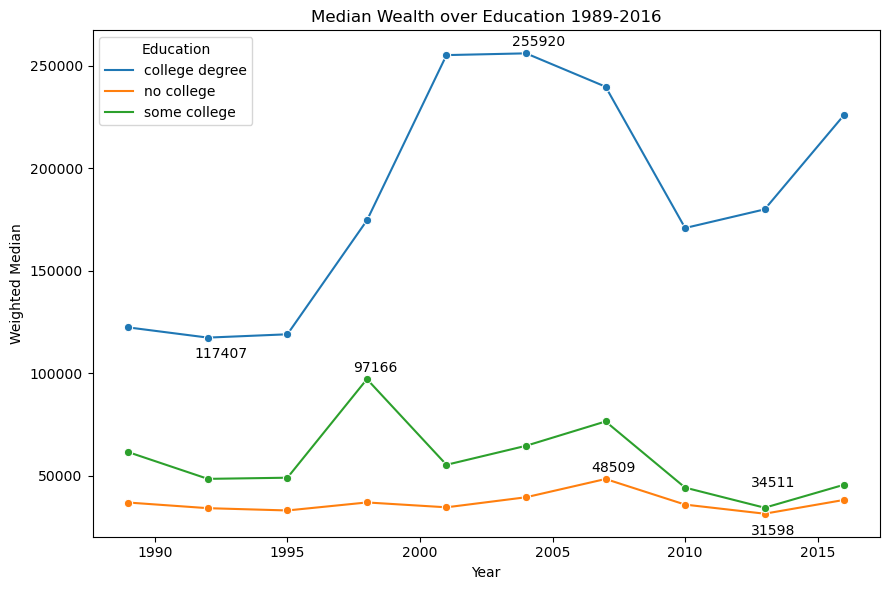

In [13]:
plt.figure(figsize=(9,6))
ax = sns.lineplot(data=medians1, x='Year', y='weighted_median', hue='Education', errorbar=None, marker='o')

def annotate_extrema(line, ax):
    y = line.get_ydata()
    if len(y) == 0:
        return
    x = line.get_xdata()
    extrema = [(y.argmax(), 'max'), (y.argmin(), 'min')]
    
    offsets = {'max': (-10, 5), 'min': (-10, -15)}
    
    # If line color matches 'some college', adjust the offset
    line_color = line.get_color()
    if line_color == ax.get_lines()[2].get_color():
        offsets['min'] = (-10, 15)  # Adjust the vertical offset value as needed
    
    for idx, extremum in extrema:
        ax.annotate(f'{int(y[idx])}', xy=(x[idx], y[idx]), xytext=offsets[extremum], textcoords='offset points', fontsize=10)

for line in ax.lines:
    annotate_extrema(line, ax)

plt.title('Median Wealth over Education 1989-2016')
plt.ylabel('Weighted Median')
plt.tight_layout()
plt.show()




In [14]:
##2 Same thing for Household Wealth

df['household_wealth']=df['asset_housing']-df['debt_housing']
df['household_wealth']

0             0.00
1             0.00
2        121280.91
3         13061.02
4         13061.02
           ...    
47771         0.00
47772    120000.00
47773         0.00
47774         0.00
47775         0.00
Name: household_wealth, Length: 47776, dtype: float64

In [15]:
def weighted_medianh(sub_df):
    sub_df = sub_df.sort_values(by='household_wealth')
    
    sub_df['cum_weights'] = sub_df['weight'].cumsum()
    
    half_weight = sub_df['weight'].sum() /2
    median_wealth = sub_df[sub_df['cum_weights'] >= half_weight]['household_wealth'].iloc[0]
    
    return median_wealth

In [16]:
## Filtered dataframe only for black & White Race

df_filtered = df[(df['race'] == 'black') | (df['race'] == 'white')]
df_filtered

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income,wealth,household_wealth
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17,2201.71,0.00
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60,0.00,0.00
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33,13676.76,13061.02
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80,7687.34,13061.02
7,8168.769554,1989,52,male,no college,black,62413.02,55975.80,3358.55,0.00,29211.50,59054.47,55975.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28,156800.00,0.00
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73,264400.00,120000.00
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46,-33500.00,0.00
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64,4330.00,0.00


In [17]:
medians2=df_filtered.groupby(['race', 'education']).apply(weighted_medianh).reset_index()

In [18]:
medians2.columns=['Race','Education','weighted_median']

In [19]:
## or with year 
medians3=df_filtered.groupby(['race', 'education','year']).apply(weighted_medianh).reset_index()
medians3.columns=['Race','Education','Year','weighted_median']


In [20]:
medians3

,Race,Education,Year,weighted_median
0,black,college degree,1989,27987.90
1,black,college degree,1992,35218.44
2,black,college degree,1995,21924.06
3,black,college degree,1998,30984.61
4,black,college degree,2001,43355.24
5,black,college degree,2004,25435.64
6,black,college degree,2007,37056.48
7,black,college degree,2010,5526.64
8,black,college degree,2013,0.00
9,black,college degree,2016,15000.00


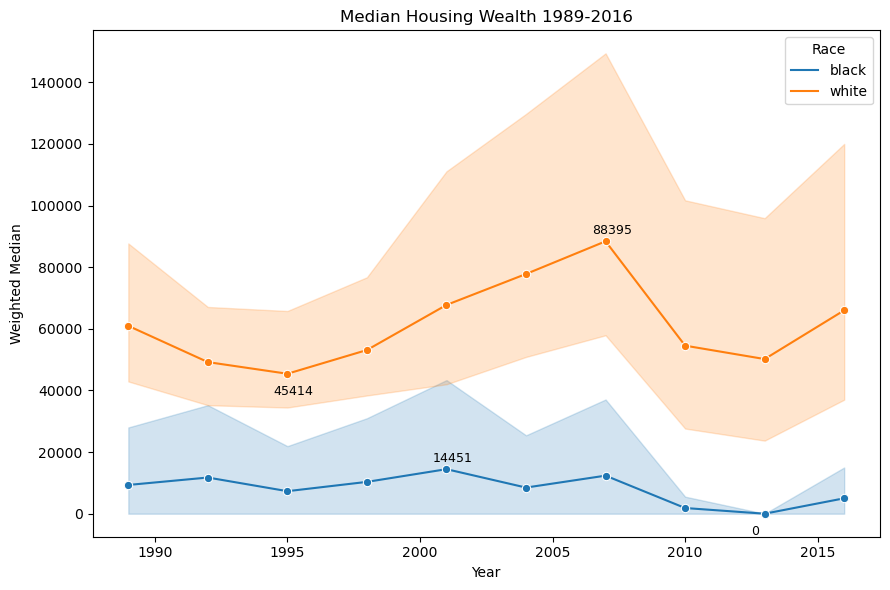

In [21]:
plt.figure(figsize=(9,6))
ax=sns.lineplot(data=medians3, x='Year', y='weighted_median', hue='Race',marker='o')

for line, name in zip(ax.lines, medians3['Race'].unique()):
    y = line.get_ydata()
    x = line.get_xdata()
    
    # annotate the highest point
    ymax = max(y)
    xpos_ymax = y.argmax()
    x_ymax = x[xpos_ymax]
    ax.annotate(f'{int(ymax)}', xy=(x_ymax, ymax), xytext=(-10,5), textcoords='offset points', fontsize=9)
    
    # annotate the lowest point
    ymin = min(y)
    xpos_ymin = y.argmin()
    x_ymin = x[xpos_ymin]
    ax.annotate(f'{int(ymin)}', xy=(x_ymin, ymin), xytext=(-10,-15), textcoords='offset points', fontsize=9)


plt.ylabel('Weighted Median')
plt.title('Median Housing Wealth 1989-2016')
plt.tight_layout()
plt.show()

In [22]:
## Question 3
df_filtered2=df_filtered[df_filtered['age']>=25]



In [23]:
df_filtered2['nhw']=df_filtered2['wealth']-df_filtered2['household_wealth']

C:\Users\adib-\AppData\Local\Temp\ipykernel_4128\884647944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['nhw']=df_filtered2['wealth']-df_filtered2['household_wealth']


In [24]:
df_filtered2

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income,wealth,household_wealth,nhw
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17,2201.71,0.00,2201.71
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60,0.00,0.00,0.00
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33,13676.76,13061.02,615.74
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80,7687.34,13061.02,-5373.68
7,8168.769554,1989,52,male,no college,black,62413.02,55975.80,3358.55,0.00,29211.50,59054.47,55975.80,3078.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28,156800.00,0.00,156800.00
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73,264400.00,120000.00,144400.00
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46,-33500.00,0.00,-33500.00
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64,4330.00,0.00,4330.00


In [25]:
def weighted_mediannhw(sub_df):
    
    sub_df = sub_df.sort_values(by='nhw')
    
    
    sub_df['cum_weights'] = sub_df['weight'].cumsum()
    
    
    half_weight = sub_df['weight'].sum() / 2
    median_wealth = sub_df[sub_df['cum_weights'] >= half_weight]['nhw'].iloc[0]

    return median_wealth

In [26]:
medians4=df_filtered2.groupby(['race', 'education','year']).apply(weighted_mediannhw).reset_index()
medians4.columns=['Race','Education','Year','nhw_median']
medians5=df_filtered2.groupby(['race', 'education','year']).apply(weighted_medianh).reset_index()
medians5.columns=['Race','Education','Year','hw_median']


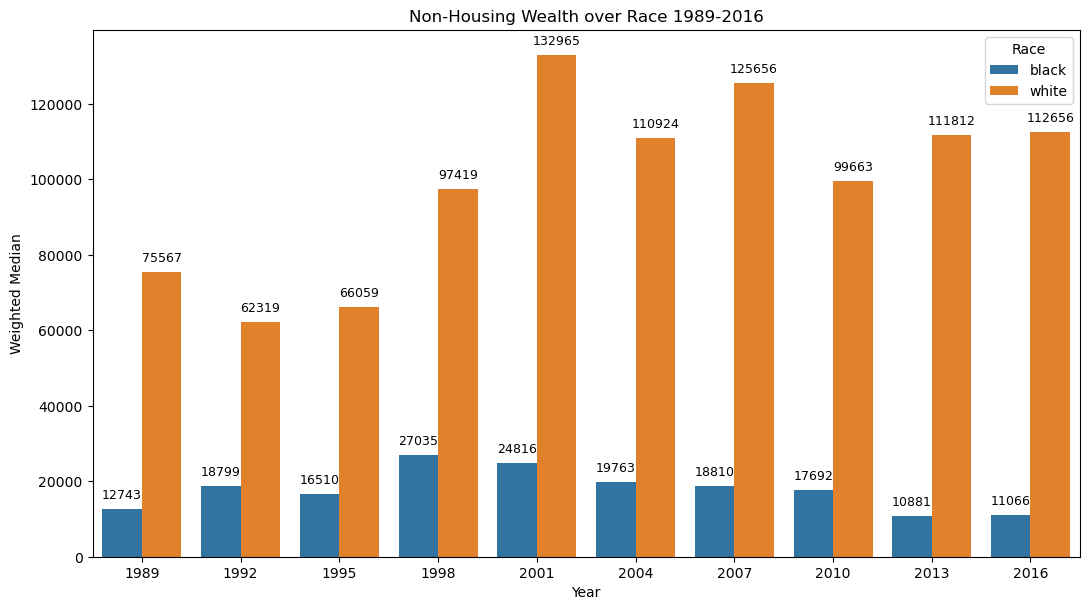

In [27]:
plt.figure(figsize=(11,6))
ax=sns.barplot(data=medians4, x='Year', y='nhw_median', hue='Race',errorbar=None)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.ylabel('Weighted Median')
plt.title('Non-Housing Wealth over Race 1989-2016')
plt.show()


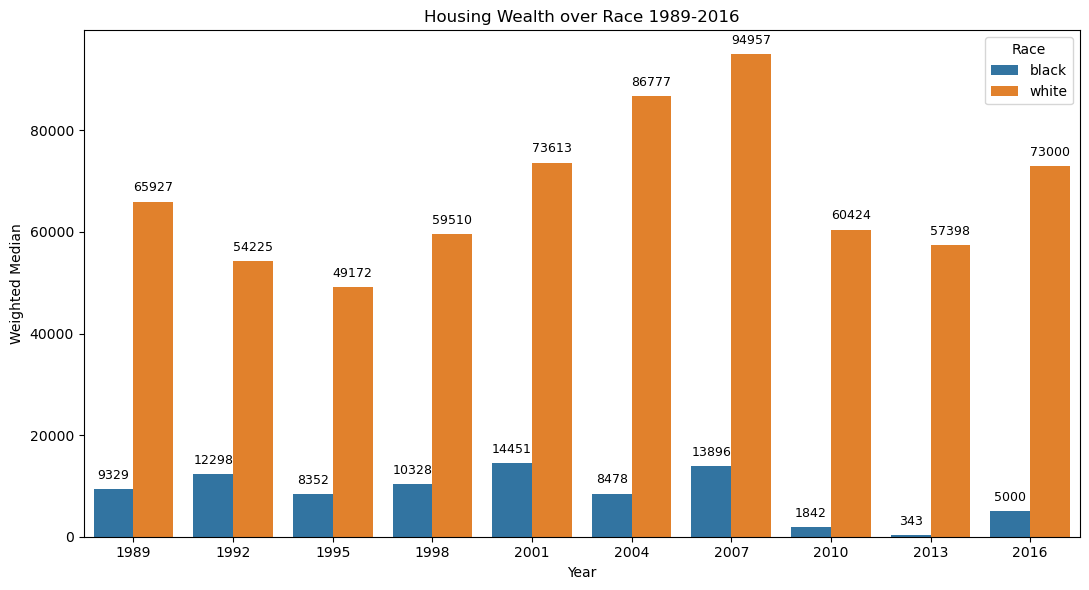

In [28]:
plt.figure(figsize=(11,6))
ax=sns.barplot(data=medians5, x='Year', y='hw_median', hue='Race',errorbar=None)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=9)

plt.ylabel('Weighted Median')
plt.title('Housing Wealth over Race 1989-2016')
plt.tight_layout()
plt.show()

In [29]:
##Question 4
base_values_2007 = medians5[medians5['Year'] == 2007].set_index(['Race', 'Education'])['hw_median'].to_dict()

In [30]:
base_values_2007

{('black', 'college degree'): 40530.53,
 ('black', 'no college'): 0.0,
 ('black', 'some college'): 1158.0099999999802,
 ('white', 'college degree'): 151699.96000000002,
 ('white', 'no college'): 63690.82000000001,
 ('white', 'some college'): 69480.9}

In [31]:
medians5[medians5['Year'] == 2007].set_index(['Race', 'Education'])

Year  hw_median
Race  Education                      
black college degree  2007   40530.53
      no college      2007       0.00
      some college    2007    1158.01
white college degree  2007  151699.96
      no college      2007   63690.82
      some college    2007   69480.90

In [32]:
base_values_2007

{('black', 'college degree'): 40530.53,
 ('black', 'no college'): 0.0,
 ('black', 'some college'): 1158.0099999999802,
 ('white', 'college degree'): 151699.96000000002,
 ('white', 'no college'): 63690.82000000001,
 ('white', 'some college'): 69480.9}

In [33]:
medians5['change from 2007']=medians5.apply(lambda row: row['hw_median'] - base_values_2007.get((row['Race'], row['Education']), 0), axis=1)

In [34]:
## Assuming we are only looking at subsequent year
medians5[medians5['Year']>2007]

,Race,Education,Year,hw_median,change from 2007
7,black,college degree,2010,5526.64,-35003.89
8,black,college degree,2013,1031.10,-39499.43
9,black,college degree,2016,15000.00,-25530.53
17,black,no college,2010,0.00,0.00
18,black,no college,2013,0.00,0.00
19,black,no college,2016,0.00,0.00
27,black,some college,2010,0.00,-1158.01
28,black,some college,2013,0.00,-1158.01
29,black,some college,2016,0.00,-1158.01
37,white,college degree,2010,105006.23,-46693.73


In [35]:
medians5[medians5['Year']==2007]

,Race,Education,Year,hw_median,change from 2007
6,black,college degree,2007,40530.53,0.0
16,black,no college,2007,0.00,0.0
26,black,some college,2007,1158.01,0.0
36,white,college degree,2007,151699.96,0.0
46,white,no college,2007,63690.82,0.0
56,white,some college,2007,69480.90,0.0


In [36]:
medians5['proportional_change_from_2007'] = medians5.apply(
    lambda row: (row['hw_median'] - base_values_2007.get((row['Race'], row['Education']))) / base_values_2007.get((row['Race'], row['Education'])) if base_values_2007.get((row['Race'], row['Education'])) != 0 else 0, 
    axis=1
)


In [37]:
pd.Series(base_values_2007)

black  college degree     40530.53
       no college             0.00
       some college        1158.01
white  college degree    151699.96
       no college         63690.82
       some college       69480.90
dtype: float64

In [42]:
medians5[medians5['Year']>2007]

,Race,Education,Year,hw_median,change from 2007,proportional_change_from_2007
7,black,college degree,2010,5526.64,-35003.89,-0.863643
8,black,college degree,2013,1031.10,-39499.43,-0.974560
9,black,college degree,2016,15000.00,-25530.53,-0.629909
17,black,no college,2010,0.00,0.00,0.000000
18,black,no college,2013,0.00,0.00,0.000000
19,black,no college,2016,0.00,0.00,0.000000
27,black,some college,2010,0.00,-1158.01,-1.000000
28,black,some college,2013,0.00,-1158.01,-1.000000
29,black,some college,2016,0.00,-1158.01,-1.000000
37,white,college degree,2010,105006.23,-46693.73,-0.307803
